Importing dependencies

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from xgboost import XGBRegressor
from joblib import dump, load

Importing the compressive strenth dataset

In [ ]:
# locading the dataset into a pandas DataFrame
compressive_strength_dataframe = pd.read_csv("Concrete_Data.csv")

In [12]:
# print the first 5 rows of our dataframe
print(compressive_strength_dataframe.head())

   Cement (component 1)(kg in a m^3 mixture)  ...  Concrete compressive strength(MPa, megapascals) 
0                                      540.0  ...                                             79.99
1                                      540.0  ...                                             61.89
2                                      332.5  ...                                             40.27
3                                      332.5  ...                                             41.05
4                                      198.6  ...                                             44.30

[5 rows x 9 columns]


In [16]:
# check for missing values
print(compressive_strength_dataframe.isnull().sum())

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64


In [17]:
# statistical measure of the dataset
print(compressive_strength_dataframe.describe())

       Cement (component 1)(kg in a m^3 mixture)  ...  Concrete compressive strength(MPa, megapascals) 
count                                1030.000000  ...                                       1030.000000
mean                                  281.167864  ...                                         35.817961
std                                   104.506364  ...                                         16.705742
min                                   102.000000  ...                                          2.330000
25%                                   192.375000  ...                                         23.710000
50%                                   272.900000  ...                                         34.445000
75%                                   350.000000  ...                                         46.135000
max                                   540.000000  ...                                         82.600000

[8 rows x 9 columns]


Understand the correlation between various features in the dataset

In [18]:
correlation = compressive_strength_dataframe.corr()

<Axes: >

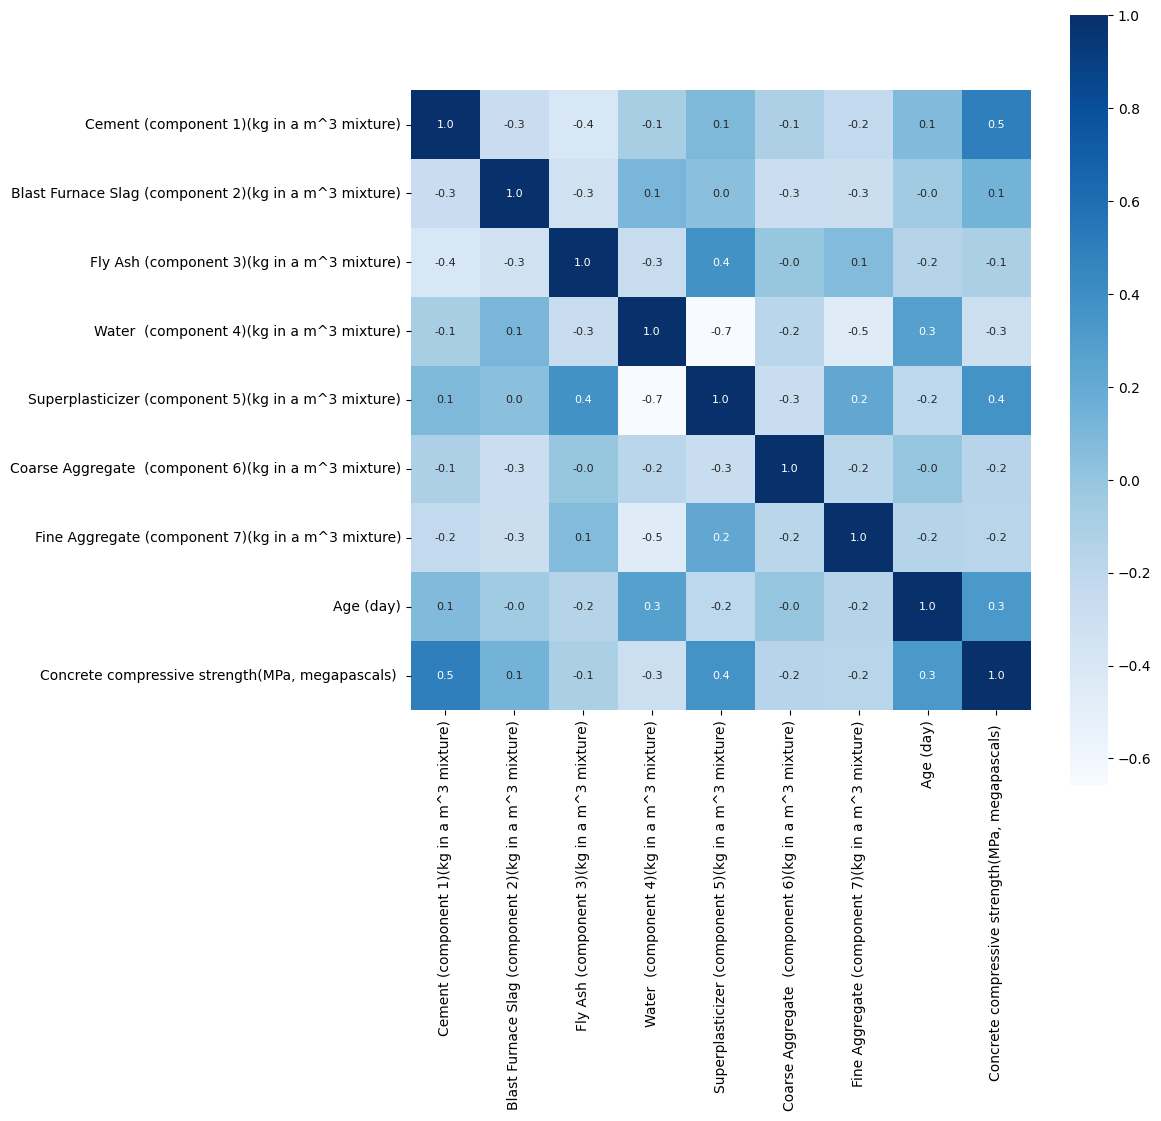

In [20]:
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size': 8}, cmap='Blues')

splitting the data and the target

In [26]:
X = compressive_strength_dataframe.drop(
    ['Concrete compressive strength(MPa, megapascals) '], axis=1)
Y = compressive_strength_dataframe['Concrete compressive strength(MPa, megapascals) ']

In [27]:
print(X)
print(Y)

      Cement (component 1)(kg in a m^3 mixture)  ...  Age (day)
0                                         540.0  ...         28
1                                         540.0  ...         28
2                                         332.5  ...        270
3                                         332.5  ...        365
4                                         198.6  ...        360
...                                         ...  ...        ...
1025                                      276.4  ...         28
1026                                      322.2  ...         28
1027                                      148.5  ...         28
1028                                      159.1  ...         28
1029                                      260.9  ...         28

[1030 rows x 8 columns]
0       79.99
1       61.89
2       40.27
3       41.05
4       44.30
        ...  
1025    44.28
1026    31.18
1027    23.70
1028    32.77
1029    32.40
Name: Concrete compressive strength(MPa, megapascals)

splitting the data into training and test data

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [29]:
print(X.shape, X_train.shape, X_test.shape)

(1030, 8) (824, 8) (206, 8)


Model Training

XGBoost Regressor

In [30]:
# loading the model
model = XGBRegressor()

In [31]:
# training the model with X_train
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [32]:
# accuracy for prediction on training data
training_data_prediction = model.predict(X_train)

In [33]:
print(training_data_prediction)

[27.979904  62.725708  23.703869  32.93016    7.726487  28.293436
 18.643084  49.201412  39.781456   4.354719  13.1762705 37.74584
 22.561169  70.66693   25.339127  76.29531   61.16809   17.53046
 41.373238  21.17851   47.225704  16.537182  22.452715  29.72801
 19.604229   9.8217945 39.013725  42.0019    39.19019   33.885696
 28.143667  38.081448  52.46781    7.7421794 32.95697   44.22724
 55.28248   35.244656  66.558685  31.02233   76.634796  17.660015
 55.03921   64.38829   34.05069   45.283794  37.37498   24.668325
 39.870667  13.69012   33.195778  17.595217  21.94831   21.204647
 21.625694  55.464863  17.627497  31.338005  13.293413  65.97642
 81.63798   28.688581  42.6873    42.12225   13.408032  12.505188
 27.053541  32.116604  39.34312   33.477253  28.416595  15.743304
 40.84551   24.01609   43.041943  34.157993   9.915939  38.556957
 24.361584  22.745445  47.212288  16.902134  33.695114  45.518017
 31.53536   20.527899  36.429707  12.343078  30.90649   38.13902
 25.224903  17.8

In [34]:
# R squred error
score_1 = metrics.r2_score(Y_train, training_data_prediction)

#mean absolute error
score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)
print("R squared error : ", score_1)
print("Mean Absolute error : ", score_2)

R squared error :  0.9959913076830818
Mean Absolute error :  0.40383082557650446


Visualize the actual Compresssive strength and Prediction Compressive strength

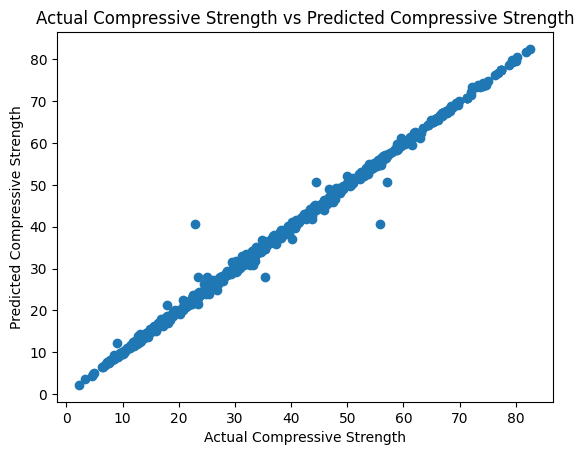

In [35]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Compressive Strength")
plt.ylabel("Predicted Compressive Strength")
plt.title("Actual Compressive Strength vs Predicted Compressive Strength")
plt.show()

Prediction on Test Data

In [36]:
test_data_prediction = model.predict(X_test)

In [37]:
# R squared error
score_1 = metrics.r2_score(Y_test, test_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_test, test_data_prediction)

print("R squared error : ", score_1)
print("Mean Absolute Error : ", score_2)

R squared error :  0.9176563827108167
Mean Absolute Error :  2.996374957538346


In [40]:
# create a dataframe with actual price and predicted price
results = pd.DataFrame({
    'Actual Compressive Strength': Y_test,
    'Predicted Compressive Strength': test_data_prediction
})

In [41]:
print(results.head(10))

      Actual Compressive Strength  Predicted Compressive Strength
31                          52.91                       52.567123
109                         55.90                       40.646648
136                         74.50                       75.995644
88                          35.30                       34.673439
918                         10.54                       10.415365
1025                        44.28                       44.726665
870                         23.69                       25.648134
318                         45.37                       48.507446
261                         37.40                       33.262131
535                         48.85                       44.181858


Save the model to local storage

In [44]:
dump(model, 'concrete_strength_model.joblib')

['concrete_strength_model.joblib']